# Data Cleaning
Firstly, we choose all the possible variables that can affect the price and remove all the NA rows.
<li><b>Select Columns</b>: We choose columns 'price','id','name','room type', 'accommodates', 'zipcode', 'bedrooms', 'beds', 'latitude', 'longitude', 'cleaning fee', 'bathrooms', 'review scores rating', 'neighbourhood cleansed', 'number of reviews', 'security deposit' and 'host listings count' included in the model.
<li><b>Include Categorial Variables</b>: 'neighbourhood' is a string column representing the location of the house and 'room type' is also a string column representing where the house is private or shared. Therefore, we transferred them into categorical variable to do data analysis instead of normal real variables.
<li><b>Fix Variables Type</b>: 'price', 'cleaning fee' and 'security deposite' needs to be float variables representing money. However, in original dataset they all string like '$100'. We transfer it into float numbers.
<li><b>Remove NA rows</b></li>
We then save the cleaned data into 'listing_cleansed.csv'.

In [1]:
import pandas as pd
import numpy as np
def read_Airbnb_data(datafile):
    import pandas as pd
    import numpy as np
    #Add the fix_zip function
    def fix_zip(input_zip):
        try:
            input_zip = int(float(input_zip))
        except:
            try:
                input_zip = int(input_zip.split('-')[0])
            except:
                return np.NaN
        if input_zip < 10000 or input_zip > 19999:
            return np.NaN
        return str(input_zip)
    #Add the fix_price function
    def fix_price(input_price):
        try:
            input_price = float(input_price)
        except:
            try:
                input_price = float(input_price[1:])
            except:
                return np.NaN
        return input_price
    
    #Read datafile
    df = pd.read_csv(datafile)
    df = df.loc[:,['price','id','name','room_type','accommodates','zipcode','bedrooms','beds','latitude','longitude',
                   'cleaning_fee','bathrooms','review_scores_rating','neighbourhood_cleansed','number_of_reviews',
                   'security_deposit','host_listings_count']]
    
    #Fix zipcode
    df['zipcode'] = df['zipcode'].apply(fix_zip)
    df['price'] = df['price'].apply(fix_price)
    df['cleaning_fee'] = df['cleaning_fee'].apply(fix_price)
    df['security_deposit'] = df['security_deposit'].apply(fix_price)
    df['neighbourhood'] = df['neighbourhood_cleansed']

    
    df.dropna(inplace=True)
    df = df[(df['number_of_reviews']>0)&(df['price']>0)&(df['id']!=20330081)]
    
    return df
df = read_Airbnb_data('listings_detailed.csv')
df.to_csv("listing_cleaned.csv",index=False,sep=',')

C:\Users\conge\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Data Normalization
In order to make the model more reasonable and with less MSE, we include this part.
<li><b>Transform the variables make them satisfy Gaussian distribution </b>: Firstly we transformn all the variables to remove the skewness and make them satisfy Gaussian distribution. The MSE of the model with data tranformation decrease from 0.41 to 0.33 compared with model without data transformation. In this way, the accuracy of the model increase a lot.
<li><b>Scale the variables make them between 0 and 1</b>: We wants to compare the impact of all factors on the dependent variable 'price' based on our model. Only when the scale of all variables are the same the parameter of the variable shows the importance of corresponding factor. Therefore, we scale the data between 0 and 1.

## Transform the data

### <li>The QQ plot of original dataset

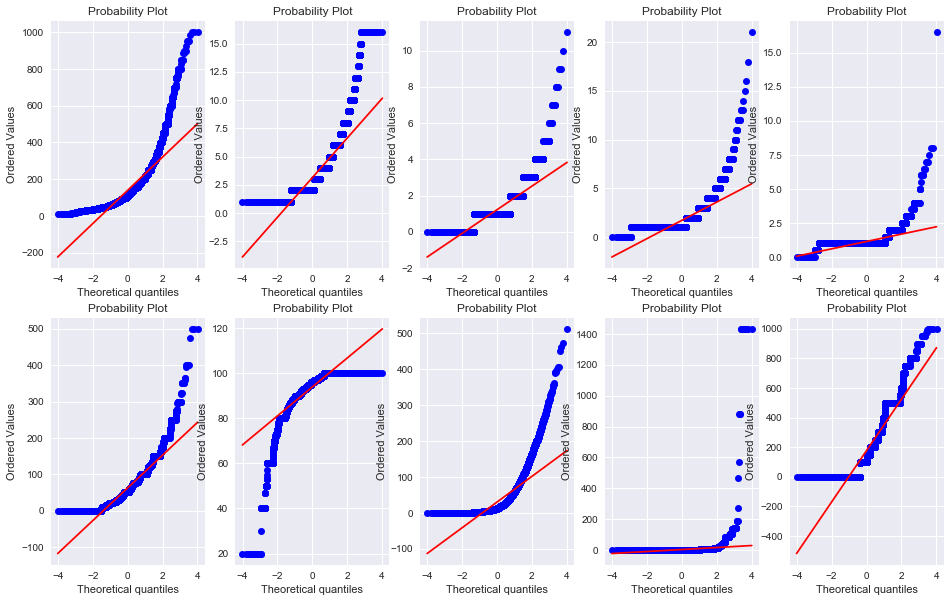

In [2]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
pylab.figure(figsize=(16, 10))
labels = ['price','accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
          'number_of_reviews','host_listings_count','security_deposit']
for i in range(10):
    ax = pylab.subplot(2,5,i+1)
    stats.probplot(df[labels[i]], dist="norm", plot=pylab)

pylab.savefig('QQ plot of original dataset')
    
pylab.show()

**From the QQ plot, we know that price, accomadates, bedrooms, beds, bathrooms,  cleaning fee and numbers of reviews are skewed right. And review scores rating is skewed left.**

### <li>Transform the data to remove the skewness.

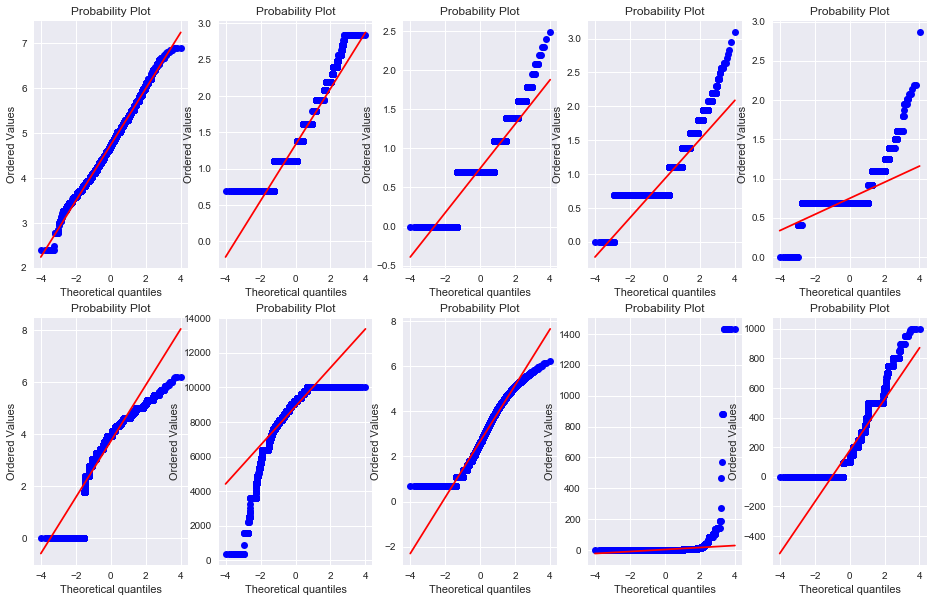

In [3]:
df_tran = df.copy()
labels = ['price','accommodates','bedrooms','beds','bathrooms','cleaning_fee', 'number_of_reviews']
for label in labels:
    df_tran[label] = df_tran[label].apply(lambda x: np.log(x+1))
df_tran['review_scores_rating'] = df_tran['review_scores_rating'].apply(lambda x: x**2)

pylab.figure(figsize=(16, 10))
labels = ['price','accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
          'number_of_reviews','host_listings_count','security_deposit']

for i in range(10):
    ax = pylab.subplot(2,5,i+1)
    stats.probplot(df_tran[labels[i]], dist="norm", plot=pylab)
pylab.savefig('QQ plot of transformed dataset')
    
pylab.show()

## Scale the data

### <li>Scale all variables between 0 and 1

In [4]:
df_tran_norm = df_tran.copy()
labels = ['price','accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
          'number_of_reviews','host_listings_count','security_deposit']

for lable in labels:
    max_tran_norm = max(df_tran[lable])
    min_tran_norm = min(df_tran[lable])
    df_tran_norm[lable] = df_tran_norm[lable].apply(lambda x: (x-min_tran_norm)/(max_tran_norm-min_tran_norm))
df_tran_norm.describe()

,price,id,accommodates,bedrooms,beds,latitude,longitude,cleaning_fee,bathrooms,review_scores_rating,number_of_reviews,security_deposit,host_listings_count
count,22806.000000,2.280600e+04,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000
mean,0.520210,1.519096e+07,0.297108,0.299673,0.301466,40.727905,-73.952592,0.600061,0.261199,0.884842,0.357723,0.176566,0.002618
std,0.138629,8.506079e+06,0.189452,0.131262,0.108360,0.054257,0.045504,0.192150,0.054219,0.130387,0.227388,0.188558,0.022224
min,0.000000,2.515000e+03,0.000000,0.000000,0.000000,40.508684,-74.239859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.416592,7.656701e+06,0.189464,0.278943,0.224244,40.688632,-73.983422,0.524096,0.242173,0.840000,0.165183,0.000000,0.000698
50%,0.512574,1.661363e+07,0.189464,0.278943,0.224244,40.722176,-73.955722,0.632471,0.242173,0.918333,0.350796,0.100100,0.000698
75%,0.614784,2.217357e+07,0.428160,0.278943,0.355418,40.762531,-73.936795,0.725614,0.242173,1.000000,0.535487,0.300300,0.001396
max,1.000000,2.889349e+07,1.000000,1.000000,1.000000,40.908039,-73.712992,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Selection
<li> <b>The correlation between decision variables</b>: All decision variables are not highly correlated, so we can include them into a model.
<li> <b>Model comparison</b>: Compare the MSE of two models, select the model model with less MSE.

## The correlation between decision variables

In [5]:
df.corr()

,price,id,accommodates,bedrooms,beds,latitude,longitude,cleaning_fee,bathrooms,review_scores_rating,number_of_reviews,security_deposit,host_listings_count
price,1.000000,-0.026693,0.585254,0.476224,0.503430,0.076333,-0.267160,0.586328,0.259741,0.035216,-0.000237,0.290790,0.027563
id,-0.026693,1.000000,0.029066,0.013623,0.019453,-0.012008,0.087945,-0.090950,0.041800,0.014743,-0.393736,-0.250787,0.026402
accommodates,0.585254,0.029066,1.000000,0.690536,0.833844,-0.032296,0.008881,0.495245,0.310310,-0.060738,0.105949,0.192530,-0.003577
bedrooms,0.476224,0.013623,0.690536,1.000000,0.699927,-0.069415,0.038183,0.391944,0.360294,-0.030410,0.027837,0.143535,-0.008905
beds,0.503430,0.019453,0.833844,0.699927,1.000000,-0.044963,0.020619,0.441458,0.336041,-0.065356,0.094264,0.174623,-0.007217
latitude,0.076333,-0.012008,-0.032296,-0.069415,-0.044963,1.000000,0.077284,0.040300,-0.061168,-0.024510,-0.003456,0.015831,0.014284
longitude,-0.267160,0.087945,0.008881,0.038183,0.020619,0.077284,1.000000,-0.210595,0.037825,-0.031827,0.011764,-0.120133,-0.022607
cleaning_fee,0.586328,-0.090950,0.495245,0.391944,0.441458,0.040300,-0.210595,1.000000,0.192040,-0.002156,-0.020168,0.397348,0.057216
bathrooms,0.259741,0.041800,0.310310,0.360294,0.336041,-0.061168,0.037825,0.192040,1.000000,-0.029557,-0.012895,0.053848,0.010144
review_scores_rating,0.035216,0.014743,-0.060738,-0.030410,-0.065356,-0.024510,-0.031827,-0.002156,-0.029557,1.000000,-0.002266,0.015576,-0.029235


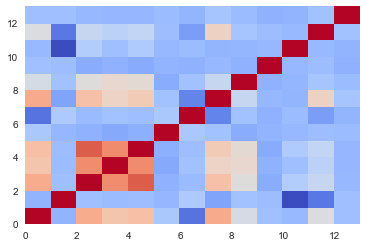

In [6]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.savefig('Correlation Coolwarm Image')
plot.show()

## Model Comparison

In [7]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.cross_validation import train_test_split
import math
import time

%matplotlib inline

C:\Users\conge\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### <li>Model without data transformation

#### Scale the untransformed data between 0 and 1

In [8]:
# Scale the untransformed data between 0 and 1
df_norm = df.copy()
labels = ['price','accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
          'number_of_reviews','host_listings_count','security_deposit']

for lable in labels:
    max_ = max(df[lable])
    min_ = min(df[lable])
    df_norm[lable] = df_norm[lable].apply(lambda x: (x-min_)/(max_-min_))
df_norm.describe()

,price,id,accommodates,bedrooms,beds,latitude,longitude,cleaning_fee,bathrooms,review_scores_rating,number_of_reviews,security_deposit,host_listings_count
count,22806.000000,2.280600e+04,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000
mean,0.131050,1.519096e+07,0.142053,0.111043,0.081367,40.727905,-73.952592,0.125205,0.069212,0.924995,0.057436,0.176566,0.002618
std,0.103017,8.506079e+06,0.132404,0.070488,0.055276,0.054257,0.045504,0.094591,0.026539,0.095658,0.085675,0.188558,0.022224
min,0.000000,2.515000e+03,0.000000,0.000000,0.000000,40.508684,-74.239859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061678,7.656701e+06,0.066667,0.090909,0.047619,40.688632,-73.983422,0.050000,0.060606,0.900000,0.005871,0.000000,0.000698
50%,0.101112,1.661363e+07,0.066667,0.090909,0.047619,40.722176,-73.955722,0.100000,0.060606,0.950000,0.023483,0.100100,0.000698
75%,0.166835,2.217357e+07,0.200000,0.090909,0.095238,40.762531,-73.936795,0.180000,0.060606,1.000000,0.072407,0.300300,0.001396
max,1.000000,2.889349e+07,1.000000,1.000000,1.000000,40.908039,-73.712992,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Separate the dataset into 20% testing set and 80% training set

In [9]:
#Seperate the dataset into training set and testing set
from sklearn.model_selection import train_test_split
neighbourhoods = df_norm['neighbourhood'].unique()
room_types = df_norm['room_type'].unique()
i = 0
for neighbourhood in neighbourhoods:
    for room_type in room_types:
        if i==0:
            train, test = train_test_split(df_norm[(df_norm['neighbourhood']==neighbourhood)&(df_norm['room_type']==room_type)], test_size = 0.2)
            i += 1
        else:
            train_1, test_1 = train_test_split(df_norm[(df_norm['neighbourhood']==neighbourhood)&(df_norm['room_type']==room_type)], test_size = 0.2)
            train = train.append(train_1)
            test = test.append(test_1)

In [10]:
# Removed rows of testing set with value of variable 'neighbourhood' not included in training set
train_neighbourhoods = train['neighbourhood'].unique()
test_neighbourhoods = test['neighbourhood'].unique()
test_not_in_train = list()
for elem in test_neighbourhoods:
    if elem not in train_neighbourhoods:
        test_not_in_train.append(elem)
test_new = test.copy()
for elem in test_not_in_train:
    test_new = test_new[test_new['neighbourhood']!=elem]

#### Fit the model without data transformation

In [11]:
#Fit the model without data transformation
reg2 = smf.ols("price ~ accommodates+bedrooms+beds+bathrooms+cleaning_fee+review_scores_rating+number_of_reviews+host_listings_count+security_deposit+C(neighbourhood)+C(room_type)", data = train).fit()
reg2

In [12]:
X_train = train[['accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
                 'number_of_reviews','host_listings_count','security_deposit','neighbourhood','room_type']]
y_train = train['price']
y_train_pred_2 = reg2.predict(X_train)

#### MSE of model without transformation

In [13]:
res2 = y_train_pred_2 - y_train
y_train_mean, y_train_std = np.mean(y_train), np.std(y_train)
y_train_pred_mean, y_train_pred_std = np.mean(y_train_pred_2), np.std(y_train_pred_2)

y_train_new = (y_train-y_train_mean)/y_train_std
y_train_pred_new = (y_train_pred_2-y_train_pred_mean)/y_train_pred_std

MSE2 = sum((y_train_pred_new-y_train_new)**2)/len(y_train)

print('MSE of traning set (Model without transformation) =',MSE2)

MSE of traning set (Model without transformation) = 0.4164437389785306


In [14]:
X_test = test_new[['accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
                 'number_of_reviews','host_listings_count','security_deposit','neighbourhood','room_type']]
y_test = test_new['price']
y_test_pred_2 = reg2.predict(X_test)

err2 = y_test_pred_2 - y_test

y_test_mean, y_test_std = np.mean(y_test), np.std(y_test)
y_test_pred_mean, y_test_pred_std = np.mean(y_test_pred_2), np.std(y_test_pred_2)

y_test_new = (y_test-y_test_mean)/y_test_std
y_test_pred_new = (y_test_pred_2-y_test_pred_mean)/y_test_pred_std

MSE = sum((y_test_pred_new-y_test_new)**2)/len(y_test)

print('MSE of testing set (Model without transformation) =',MSE)

MSE of testing set (Model without transformation) = 0.4417240258014408


### <li>Model with data transformation

#### Separate the dataset into 20% testing set and 80% training set

In [15]:
from sklearn.model_selection import train_test_split
neighbourhoods = df_tran_norm['neighbourhood'].unique()
room_types = df_tran_norm['room_type'].unique()
i = 0
for neighbourhood in neighbourhoods:
    for room_type in room_types:
        if i==0:
            train, test = train_test_split(df_tran_norm[(df_tran_norm['neighbourhood']==neighbourhood)&(df_tran_norm['room_type']==room_type)], test_size = 0.23)
            i += 1
        else:
            train_1, test_1 = train_test_split(df_tran_norm[(df_tran_norm['neighbourhood']==neighbourhood)&(df_tran_norm['room_type']==room_type)], test_size = 0.2)
            train = train.append(train_1)
            test = test.append(test_1)

In [16]:
train_neighbourhoods = train['neighbourhood'].unique()
test_neighbourhoods = test['neighbourhood'].unique()
test_not_in_train = list()
for elem in test_neighbourhoods:
    if elem not in train_neighbourhoods:
        test_not_in_train.append(elem)
test_new = test.copy()
for elem in test_not_in_train:
    test_new = test_new[test_new['neighbourhood']!=elem]

#### Fit the model with data tranformation

In [17]:
reg1 = smf.ols("price ~ accommodates+bedrooms+beds+bathrooms+cleaning_fee+review_scores_rating+number_of_reviews+host_listings_count+security_deposit+C(neighbourhood)+C(room_type)", data = train).fit()
reg1

In [18]:
X_train = train[['accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
                 'number_of_reviews','host_listings_count','security_deposit','neighbourhood','room_type']]
y_train = train['price']
y_train_pred_1 = reg1.predict(X_train)

#### MSE of model with data transformation

In [19]:
res1 = y_train_pred_1 - y_train
y_train_mean, y_train_std = np.mean(y_train), np.std(y_train)
y_train_pred_mean, y_train_pred_std = np.mean(y_train_pred_1), np.std(y_train_pred_1)

y_train_new = (y_train-y_train_mean)/y_train_std
y_train_pred_new = (y_train_pred_1-y_train_pred_mean)/y_train_pred_std

MSE = sum((y_train_pred_new-y_train_new)**2)/len(y_train)

print('MSE of training set (Model with transformation) =',MSE)

MSE of training set (Model with transformation) = 0.3097538229018704


In [20]:
X_test = test_new[['accommodates','bedrooms','beds','bathrooms','cleaning_fee','review_scores_rating',
                 'number_of_reviews','host_listings_count','security_deposit','neighbourhood','room_type']]
y_test = test_new['price']
y_test_pred_1 = reg1.predict(X_test)

err1 = y_test_pred_1 - y_test

y_test_mean, y_test_std = np.mean(y_test), np.std(y_test)
y_test_pred_mean, y_test_pred_std = np.mean(y_test_pred_1), np.std(y_test_pred_1)

y_test_new = (y_test-y_test_mean)/y_test_std
y_test_pred_new = (y_test_pred_1-y_test_pred_mean)/y_test_pred_std

MSE = sum((y_test_pred_new-y_test_new)**2)/len(y_test)

print('MSE of testing set (Model with transformation) =',MSE)

MSE of testing set (Model with transformation) = 0.3298472277641042


### <li> Model selection:</li>
The MSE of the model with data transformation is 0.315, which is much more smaller than 0.434, the one without data tranformation. Therefore, we choose the model with data transformation for price estimation.

# Price perdiction

We use the model with data transformation we fitted before for price prediction.

## Predict the price

In [21]:
max_ = max(df_tran['price'])
min_ = min(df_tran['price'])
def price_return(x,max_,min_):
    x1 = x*(max_ - min_)+min_
    x2 = np.exp(x1)+1
    return x2
price_predict =y_test_pred_1.apply(lambda x: price_return(x,max_,min_))
price_true = df.loc[price_predict.index,'price']

## The accuracy of this prediction

#### <li> Residual plot of price prediction

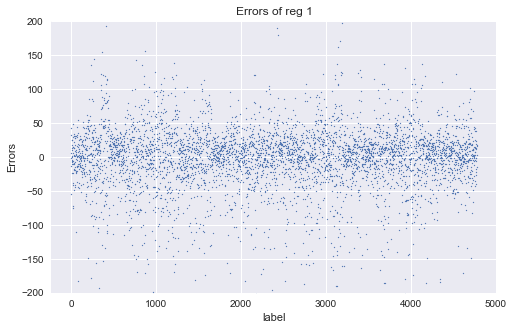

In [22]:
err = price_predict-price_true
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1,1,1)

ax1.set_title("Errors of reg 1")
ax1.scatter(range(len(err)),err,s=1)
ax1.set_xlabel("label")
ax1.set_ylabel("Errors")
ax1.set_ylim(-200,200)

plt.show()

From the plot, the errors are floating up and down on the X-axis. We then want's to know the floating rate.

#### <li> The histogram of error percentage

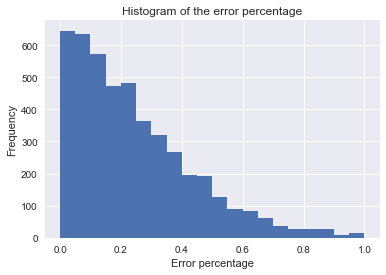

In [23]:
err_pct = np.abs(err)/price_true
plt.hist(err_pct,range=(0,1),bins=20)
plt.title('Histogram of the error percentage')
plt.xlabel('Error percentage')
plt.ylabel('Frequency')
plt.show()

In this plot, the X-axis means the error percentage of the price perdiction. For example, if the true price is 100 and the estimated price is 120, the error percentage is 0.2. The Y-axise is how many times a certain error percentage occurs.

In [24]:
err_pct.quantile(0.7)

0.3231941956473653

We know that the error percentage of 70% houses in the testing set is below 33%. Therefore, our perdiction model is reasonable.

## Table visulization of price perdiction

In [25]:
!pip install beautifultable
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ['Listing Name','True Value','Prediction']

names = df.loc[price_predict.index,'name'].tolist()
pred_num = price_predict.tolist()
test_num = price_true.tolist()
for i in range(len(names)):
    table.append_row([names[i],float(test_num[i]),float(pred_num[i])])
print(table)

+----------------------------------------------------+------------+------------+
|                    Listing Name                    | True Value | Prediction |
+----------------------------------------------------+------------+------------+
|   Cute Manhattan bedroom, close to all amenities   |   120.0    |   65.685   |
+----------------------------------------------------+------------+------------+
|    Private Clean, Spacious Room in West Harlem!    |    34.0    |   76.114   |
+----------------------------------------------------+------------+------------+
| Private Bdrm & Bath-30-night min-Weekly Maid Serv. |    79.0    |   76.988   |
+----------------------------------------------------+------------+------------+
|         Large  room in 2 bed/1bath on park         |    89.0    |   74.91    |
+----------------------------------------------------+------------+------------+
|  Brownstone Sanctuary, a Private Studio Apartment  |    87.0    |   92.665   |
+---------------------------

In [26]:
error = [abs(pred_num[i]-test_num[i]) for i in range(len(pred_num))]
pred_data = {'Listing Name':names, 'True Price':test_num, 'Prediction Price':pred_num, 'Error':error}
df_pred = pd.DataFrame(pred_data)
df_pred.set_index('Listing Name',inplace=True)
df_pred.to_csv('Price Prediction.csv')

# Discussion: The impact of all factors on the price

We know that in a linear regression model of a scaled dataset, the absolute value of a parameter shows the influnce of the corresponding variable to the whole model. Therfore, from the coefficients of our model:

In [27]:
coef = reg1.params
coef_others = coef[185:]
coef_others.reindex(coef_others.abs().sort_values(inplace=False,ascending=False).index)

accommodates            0.190191
bathrooms               0.156091
bedrooms                0.121943
review_scores_rating    0.081585
cleaning_fee            0.038292
security_deposit        0.037214
beds                    0.034624
number_of_reviews      -0.011458
host_listings_count    -0.007602
dtype: float64

#### We know that the influnce of all factors on price can be ordered as:

accommodates > bathrooms > bedrooms > review_scores_rating > security_deposite > cleaning_fee > beds > number_of_reviews > host_listings_count

#### To better visualize it, we use the word cloud:

In [28]:
keys = coef_others.index
dict_coef = dict()
for key in keys:
    dict_coef[key] = np.abs(coef_others[key])

C:\Users\conge\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\conge\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\conge\\Anaconda3\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


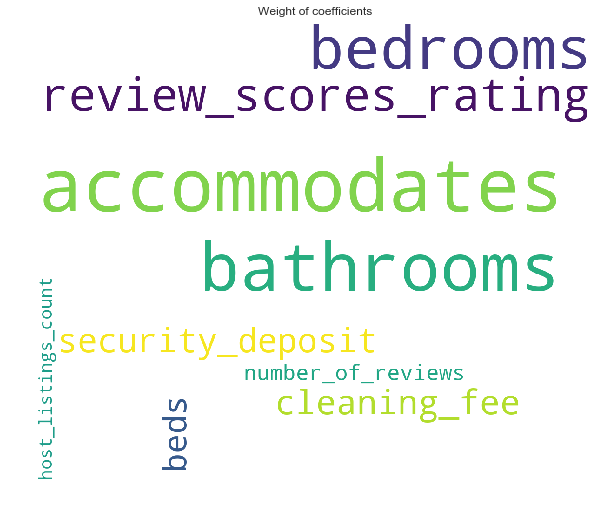

<Figure size 432x288 with 0 Axes>

In [29]:
import wordcloud
cloud = wordcloud.WordCloud(background_color='white',width=1200,height=1000,max_words=20)
cloud.fit_words(dict_coef)
plt.figure(figsize=(10,10))
plt.title('Weight of coefficients')
plt.imshow(cloud)
plt.axis('off')
plt.show()
plt.savefig('Weight of coefficients')